In [1]:
import pandas as pd

In [2]:
cd C:/Users/santh/OneDrive/Desktop/Course Materials/Data Mining/Final Project/Git-Code/Dock_Watch/01. Data Collection & Storage/03. Collected Datasets/02. Preprocessed Data/

C:\Users\santh\OneDrive\Desktop\Course Materials\Data Mining\Final Project\Git-Code\Dock_Watch\01. Data Collection & Storage\03. Collected Datasets\02. Preprocessed Data


In [3]:
ls

 Volume in drive C is Windows
 Volume Serial Number is F87E-CA71

 Directory of C:\Users\santh\OneDrive\Desktop\Course Materials\Data Mining\Final Project\Git-Code\Dock_Watch\01. Data Collection & Storage\03. Collected Datasets\02. Preprocessed Data

04-12-2023  01.22 PM    <DIR>          .
03-12-2023  02.43 PM    <DIR>          ..
04-12-2023  11.50 AM       139,874,499 01_Master_Analysis_Data_10_16_12_02.csv
03-12-2023  02.43 PM        51,857,179 01_sample_usable_data_for_initial_analysis.csv
04-12-2023  01.22 PM       174,775,429 merged_data_final.csv
04-12-2023  01.01 PM            44,506 weather_oct31_dec2.csv
               4 File(s)    366,551,613 bytes
               2 Dir(s)  22,585,253,888 bytes free


In [4]:

df = pd.read_csv('C:/Users/santh/OneDrive/Desktop/Course Materials/Data Mining/Final Project/Git-Code/Dock_Watch/01. Data Collection & Storage/03. Collected Datasets/02. Preprocessed Data/01_Master_Analysis_Data_10_16_12_02.csv')

weather_df = pd.read_csv('C:/Users/santh/OneDrive/Desktop/Course Materials/Data Mining/Final Project/Git-Code/Dock_Watch/01. Data Collection & Storage/03. Collected Datasets/02. Preprocessed Data/weather_oct31_dec2.csv')

In [25]:
weather_df

,Unnamed: 0,date,temperature_2m,precipitation_probability,rain,snowfall,snow_depth,visibility
0,0,2023-10-31 00:00:00,1.8935,0.0,0.0,0.0,0.03,48700.0
1,1,2023-10-31 01:00:00,0.4935,0.0,0.0,0.0,0.03,42200.0
2,2,2023-10-31 02:00:00,0.6935,0.0,0.0,0.0,0.03,51100.0
3,3,2023-10-31 03:00:00,0.1435,0.0,0.0,0.0,0.03,57800.0
4,4,2023-10-31 04:00:00,-1.2065,0.0,0.0,0.0,0.03,50600.0
...,...,...,...,...,...,...,...,...
787,787,2023-12-02 19:00:00,4.2435,0.0,0.0,0.0,0.00,64000.0
788,788,2023-12-02 20:00:00,4.3435,0.0,0.0,0.0,0.00,71100.0
789,789,2023-12-02 21:00:00,3.9935,0.0,0.0,0.0,0.00,68200.0
790,790,2023-12-02 22:00:00,3.3935,0.0,0.0,0.0,0.00,64700.0


In [32]:
weather_df['temperature_2m'].value_counts()

 3.593500     7
 6.493500     6
 3.043500     6
 2.893500     6
 4.043500     6
             ..
-6.606500     1
 0.343500     1
-0.406500     1
 16.043499    1
 6.093500     1
Name: temperature_2m, Length: 431, dtype: int64

In [33]:
df['datatime_rnd']

0         2023-10-31 00:00:00
1         2023-10-31 00:00:00
2         2023-10-31 00:00:00
3         2023-10-31 00:00:00
4         2023-10-31 00:00:00
                 ...         
494758    2023-12-02 23:30:00
494759    2023-12-02 23:33:00
494760    2023-12-02 23:33:00
494761    2023-12-02 23:36:00
494762    2023-12-02 23:39:00
Name: datatime_rnd, Length: 494763, dtype: object

In [39]:
import pandas as pd

# Assuming df1 contains data for every minute and df2 contains data for every hour
# Convert the datetime columns to datetime format if they aren't already
df['datatime_rnd'] = pd.to_datetime(df['datatime_rnd'])
weather_df['date'] = pd.to_datetime(weather_df['date'])

# Merge df1 and df2 based on nearest timestamps
merged_df = pd.merge_asof(df.sort_values('datatime_rnd'), weather_df.sort_values('date'), 
                          left_on='datatime_rnd', right_on='date', direction='nearest')

# Output the merged DataFrame
display(merged_df)
merged_df.to_csv('merged_data_final.csv')

,cu_class_status,station_last_updated,status_last_reported,station_id,station_name,station_address,station_longitude,station_latitude,station_is_returning,station_is_renting,...,bike_wait_time,dock_wait_time,Unnamed: 0,date,temperature_2m,precipitation_probability,rain,snowfall,snow_depth,visibility
0,Regular,1698732017,1698732020,bcycle_boulder_1855,Folsom & Colorado,SE corner of Folsom & Colorado,-105.26385,40.00811,1,1,...,84.0,366.0,0,2023-10-31 00:00:00,1.8935,0.0,0.0,0.0,0.03,48700.0
1,Regular,1698732017,1698732020,bcycle_boulder_2764,Folsom & Pearl,2479 Pearl St.,-105.26364,40.02144,1,1,...,606.0,438.0,0,2023-10-31 00:00:00,1.8935,0.0,0.0,0.0,0.03,48700.0
2,Regular,1698732017,1698732020,bcycle_boulder_2766,13th & Arapahoe,Boulder Creek Path,-105.27764,40.01450,1,1,...,591.0,684.0,0,2023-10-31 00:00:00,1.8935,0.0,0.0,0.0,0.03,48700.0
3,Regular,1698732017,1698732020,bcycle_boulder_2767,18th & Colorado,1725 Euclid Ave,-105.26912,40.00813,1,1,...,363.0,447.0,0,2023-10-31 00:00:00,1.8935,0.0,0.0,0.0,0.03,48700.0
4,Regular,1698732017,1698732020,bcycle_boulder_2768,48th & Arapahoe,4791 Arapahoe Ave.,-105.23558,40.01490,1,1,...,618.0,480.0,0,2023-10-31 00:00:00,1.8935,0.0,0.0,0.0,0.03,48700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494758,No Class,1701585033,1701585035,bcycle_boulder_4657,Farrand Field,2005 Baker Dr,-105.26724,40.00660,1,1,...,3.0,9.0,791,2023-12-02 23:00:00,3.0935,0.0,0.0,0.0,0.00,70600.0
494759,No Class,1701585231,1701585233,bcycle_boulder_2144,Broadway & Euclid,950 Regent Drive,-105.27240,40.00638,1,1,...,3.0,6.0,791,2023-12-02 23:00:00,3.0935,0.0,0.0,0.0,0.00,70600.0
494760,No Class,1701585231,1701585233,bcycle_boulder_3318,18th & Euclid,1725 Euclid,-105.26981,40.00584,1,1,...,6.0,24.0,791,2023-12-02 23:00:00,3.0935,0.0,0.0,0.0,0.00,70600.0
494761,No Class,1701585362,1701585364,bcycle_boulder_3318,18th & Euclid,1725 Euclid,-105.26981,40.00584,1,1,...,3.0,21.0,791,2023-12-02 23:00:00,3.0935,0.0,0.0,0.0,0.00,70600.0


In [8]:
ls

 Volume in drive C is Windows
 Volume Serial Number is F87E-CA71

 Directory of C:\Users\santh\OneDrive\Desktop\Course Materials\Data Mining\Final Project\Git-Code\Dock_Watch\01. Data Collection & Storage\03. Collected Datasets\02. Preprocessed Data

04-12-2023  01.22 PM    <DIR>          .
03-12-2023  02.43 PM    <DIR>          ..
04-12-2023  11.50 AM       139,874,499 01_Master_Analysis_Data_10_16_12_02.csv
03-12-2023  02.43 PM        51,857,179 01_sample_usable_data_for_initial_analysis.csv
04-12-2023  01.22 PM       174,775,429 merged_data_final.csv
04-12-2023  01.01 PM            44,506 weather_oct31_dec2.csv
               4 File(s)    366,551,613 bytes
               2 Dir(s)  22,584,320,000 bytes free


In [9]:
merged_df = pd.read_csv('merged_data_final.csv')

In [10]:
merged_df

,Unnamed: 0,cu_class_status,station_last_updated,status_last_reported,station_id,station_name,station_address,station_longitude,station_latitude,station_is_returning,...,bike_wait_time,dock_wait_time,Unnamed: 0.1,date,temperature_2m,precipitation_probability,rain,snowfall,snow_depth,visibility
0,0,Regular,1698732017,1698732020,bcycle_boulder_1855,Folsom & Colorado,SE corner of Folsom & Colorado,-105.26385,40.00811,1,...,84.0,366.0,0,2023-10-31 00:00:00,1.8935,0.0,0.0,0.0,0.03,48700.0
1,1,Regular,1698732017,1698732020,bcycle_boulder_2764,Folsom & Pearl,2479 Pearl St.,-105.26364,40.02144,1,...,606.0,438.0,0,2023-10-31 00:00:00,1.8935,0.0,0.0,0.0,0.03,48700.0
2,2,Regular,1698732017,1698732020,bcycle_boulder_2766,13th & Arapahoe,Boulder Creek Path,-105.27764,40.01450,1,...,591.0,684.0,0,2023-10-31 00:00:00,1.8935,0.0,0.0,0.0,0.03,48700.0
3,3,Regular,1698732017,1698732020,bcycle_boulder_2767,18th & Colorado,1725 Euclid Ave,-105.26912,40.00813,1,...,363.0,447.0,0,2023-10-31 00:00:00,1.8935,0.0,0.0,0.0,0.03,48700.0
4,4,Regular,1698732017,1698732020,bcycle_boulder_2768,48th & Arapahoe,4791 Arapahoe Ave.,-105.23558,40.01490,1,...,618.0,480.0,0,2023-10-31 00:00:00,1.8935,0.0,0.0,0.0,0.03,48700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494758,494758,No Class,1701585033,1701585035,bcycle_boulder_4657,Farrand Field,2005 Baker Dr,-105.26724,40.00660,1,...,3.0,9.0,791,2023-12-02 23:00:00,3.0935,0.0,0.0,0.0,0.00,70600.0
494759,494759,No Class,1701585231,1701585233,bcycle_boulder_2144,Broadway & Euclid,950 Regent Drive,-105.27240,40.00638,1,...,3.0,6.0,791,2023-12-02 23:00:00,3.0935,0.0,0.0,0.0,0.00,70600.0
494760,494760,No Class,1701585231,1701585233,bcycle_boulder_3318,18th & Euclid,1725 Euclid,-105.26981,40.00584,1,...,6.0,24.0,791,2023-12-02 23:00:00,3.0935,0.0,0.0,0.0,0.00,70600.0
494761,494761,No Class,1701585362,1701585364,bcycle_boulder_3318,18th & Euclid,1725 Euclid,-105.26981,40.00584,1,...,3.0,21.0,791,2023-12-02 23:00:00,3.0935,0.0,0.0,0.0,0.00,70600.0


In [15]:
merged_df = merged_df.loc[merged_df['station_capacity'] !=merged_df['new_bikes_available'] ]

In [16]:
merged_df.shape

(494690, 44)

In [17]:
df = merged_df[['cu_class_status', 'day_of_week_rnd',  'hour_rnd','station_name','docks_available', 'bikes_available', 'station_capacity','new_docks_available', 'new_bikes_available','bike_wait_time','dock_wait_time','temperature_2m', 'precipitation_probability', 'snow_depth', 'visibility']] 

In [18]:
when station capacity is full remove that row bike_availabel ==station_capacity == remove
add temp data
add station id

['Folsom & Colorado','13th & College','Broadway & Euclid','CU Recreation Center','18th & Colorado','Farrand Field','Center for Community @ Regent Drive','Broadway & Baseline','Timber Ridge @ Adams Circle','Williams Village']

SyntaxError: invalid syntax (Temp/ipykernel_12272/2051118435.py, line 1)

In [19]:
# selected_stations = [
#     'Folsom & Colorado', '13th & College', 'Broadway & Euclid', 'CU Recreation Center',
#     '18th & Colorado', 'Farrand Field', 'Center for Community @ Regent Drive',
#     'Broadway & Baseline', 'Timber Ridge @ Adams Circle', 'Williams Village'
# ]
selected_stations = [
    'Folsom & Colorado'
]

# Assuming df is your DataFrame
df = df[df['station_name'].isin(selected_stations)]


In [20]:
df.shape

(9790, 15)

In [21]:
df.columns

Index(['cu_class_status', 'day_of_week_rnd', 'hour_rnd', 'station_name',
       'docks_available', 'bikes_available', 'station_capacity',
       'new_docks_available', 'new_bikes_available', 'bike_wait_time',
       'dock_wait_time', 'temperature_2m', 'precipitation_probability',
       'snow_depth', 'visibility'],
      dtype='object')

In [22]:
df.dtypes

cu_class_status               object
day_of_week_rnd               object
hour_rnd                       int64
station_name                  object
docks_available                int64
bikes_available                int64
station_capacity               int64
new_docks_available            int64
new_bikes_available            int64
bike_wait_time               float64
dock_wait_time               float64
temperature_2m               float64
precipitation_probability    float64
snow_depth                   float64
visibility                   float64
dtype: object

In [23]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
columns_to_encode = ['cu_class_status', 'day_of_week_rnd', 'station_name']

label_encoder = LabelEncoder()

# Apply label encoding to each column
for col in columns_to_encode:
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])

# Drop the original categorical columns if needed
df.drop(columns=columns_to_encode, inplace=True)

In [24]:
df.head()

,hour_rnd,docks_available,bikes_available,station_capacity,new_docks_available,new_bikes_available,bike_wait_time,dock_wait_time,temperature_2m,precipitation_probability,snow_depth,visibility,cu_class_status_encoded,day_of_week_rnd_encoded,station_name_encoded
0,0,15,0,15,0,0,84.0,366.0,1.8935,0.0,0.03,48700.0,1,5,0
91,0,15,0,15,0,0,81.0,363.0,1.8935,0.0,0.03,48700.0,1,5,0
144,0,15,0,15,0,0,78.0,360.0,1.8935,0.0,0.03,48700.0,1,5,0
198,0,15,0,15,0,0,75.0,357.0,1.8935,0.0,0.03,48700.0,1,5,0
244,0,15,0,15,0,0,72.0,354.0,1.8935,0.0,0.03,48700.0,1,5,0


In [25]:
df.columns

Index(['hour_rnd', 'docks_available', 'bikes_available', 'station_capacity',
       'new_docks_available', 'new_bikes_available', 'bike_wait_time',
       'dock_wait_time', 'temperature_2m', 'precipitation_probability',
       'snow_depth', 'visibility', 'cu_class_status_encoded',
       'day_of_week_rnd_encoded', 'station_name_encoded'],
      dtype='object')

## Check for Linearity

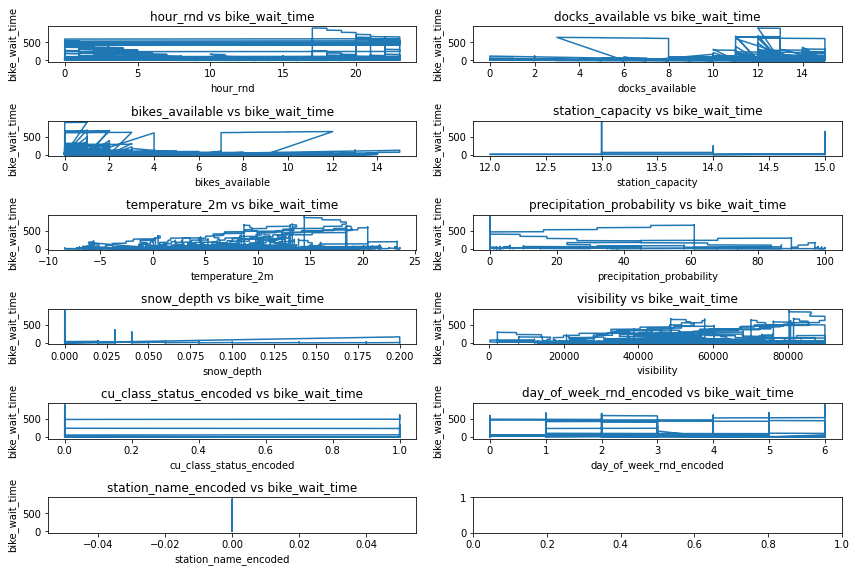

In [26]:
import matplotlib.pyplot as plt
import math

# Assuming df is your DataFrame containing the specified columns
input_cols = ['hour_rnd', 'docks_available', 'bikes_available', 'station_capacity',
        'temperature_2m', 'precipitation_probability',
       'snow_depth', 'visibility', 'cu_class_status_encoded',
       'day_of_week_rnd_encoded', 'station_name_encoded']
output_col = 'bike_wait_time'

num_cols = len(input_cols)
num_rows = math.ceil(num_cols / 2)  # Adjust rows based on the number of columns for layout

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 8))  # Create a layout of subplots

for i, col in enumerate(input_cols):
    row = i // 2
    col_num = i % 2
    ax = axes[row, col_num] if num_rows > 1 else axes[col_num]
    ax.plot(df[col], df[output_col])
    ax.set_title(f'{col} vs {output_col}')
    ax.set_xlabel(col)
    ax.set_ylabel(output_col)

# Adjust layout
plt.tight_layout()
plt.show()


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
df.reset_index(drop=True, inplace=True)
# Assuming df is your DataFrame containing the specified columns
input_cols = ['hour_rnd', 'docks_available', 'bikes_available', 'station_capacity',
       'new_docks_available', 'new_bikes_available', 'temperature_2m', 'precipitation_probability',
       'snow_depth', 'visibility', 'cu_class_status_encoded',
       'day_of_week_rnd_encoded', 'station_name_encoded']
output_col = 'bike_wait_time'
num_cols = len(input_cols)
num_rows = math.ceil(num_cols / 2)  # Adjust rows based on the number of columns for layout

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 8))  # Create a layout of subplots

for i, col in enumerate(input_cols):
    row = i // 2
    col_num = i % 2
    ax = axes[row, col_num] if num_rows > 1 else axes[col_num]
    
    # Scatter plot
    ax.scatter(df[col], df[output_col], label='Actual')
    
    # Fit polynomial regression line
    poly = PolynomialFeatures(degree=2)  # You can adjust the degree for higher order relationships
    X_poly = poly.fit_transform(df[[col]])
    model = LinearRegression().fit(X_poly, df[output_col])
    y_pred = model.predict(X_poly)
    
    # Sort the values for smooth curve plotting
    sort_axis = np.argsort(df[col])
    ax.plot(df[col][sort_axis], y_pred[sort_axis], color='red', label='Predicted (Polynomial)')
    
    ax.set_title(f'{col} vs {output_col}')
    ax.set_xlabel(col)
    ax.set_ylabel(output_col)
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()


NameError: name 'df' is not defined

## No linear relationship - proved

In [28]:
# X_bike = df[['hour_rnd', 'docks_available', 'bikes_available', 'station_capacity',
#  'temperature_2m', 'precipitation_probability',
#        'snow_depth', 'visibility', 'cu_class_status_encoded',
#        'day_of_week_rnd_encoded', 'station_name_encoded']]
# Y_bike = df[['bike_wait_time']]
# X_dock = df[['hour_rnd', 'docks_available', 'bikes_available', 'station_capacity',
#      'temperature_2m', 'precipitation_probability',
#        'snow_depth', 'visibility', 'cu_class_status_encoded',
#        'day_of_week_rnd_encoded', 'station_name_encoded']]
# Y_dock = df[['dock_wait_time']]



X_bike = df[['hour_rnd', 'docks_available', 'bikes_available', 'station_capacity',
 'temperature_2m', 'precipitation_probability',
       'snow_depth', 'visibility', 'cu_class_status_encoded',
       'day_of_week_rnd_encoded', 'station_name_encoded']]
Y_bike = df[['bike_wait_time']]
X_dock = df[['hour_rnd', 'docks_available', 'bikes_available', 'station_capacity',
     'temperature_2m', 'precipitation_probability',
       'snow_depth', 'visibility', 'cu_class_status_encoded',
       'day_of_week_rnd_encoded', 'station_name_encoded']]
Y_dock = df[['dock_wait_time']]

Mean Squared Error (MSE): 13157.445344791713
Root Mean Squared Error (RMSE): 114.70590806402133
Mean Absolute Error (MAE): 65.53499453425772
R-squared: 0.41724046362875944


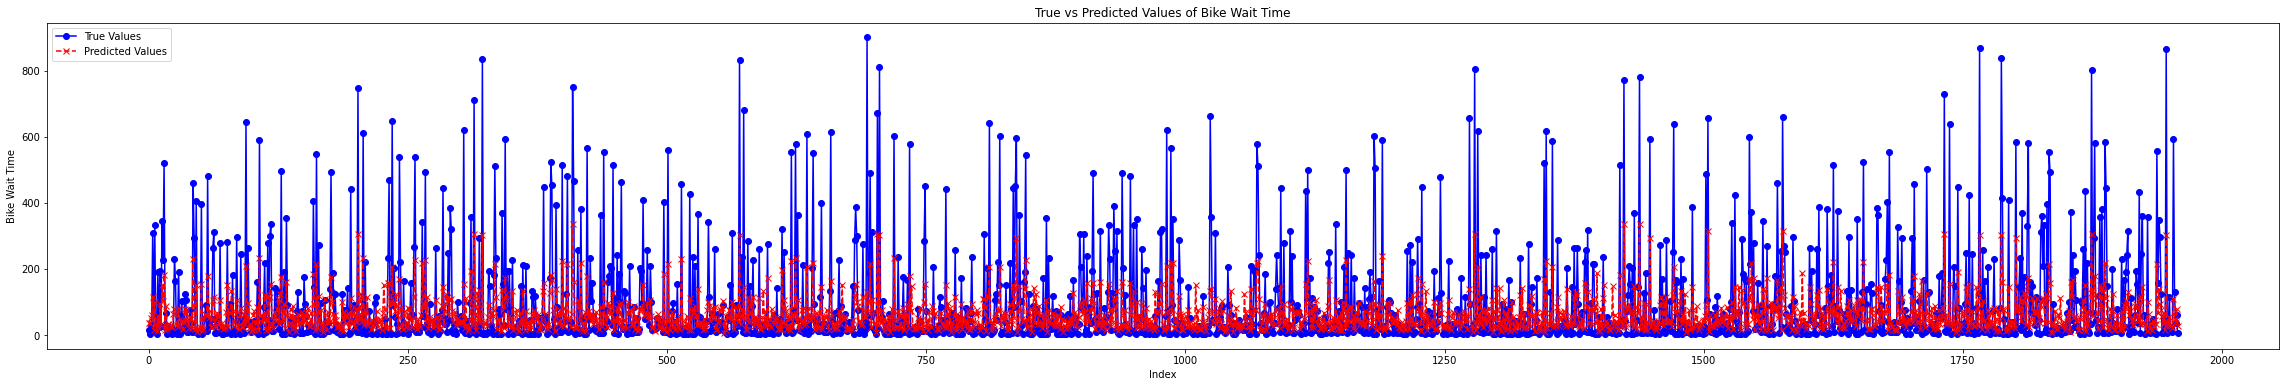

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import xgboost as xgb

# Assuming X_bike contains input features and Y_bike contains output variable
X_train, X_test, y_train, y_test = train_test_split(X_bike, Y_bike, test_size=0.2, random_state=42)

# Initialize XGBoost regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=10)

# Fit the model
xg_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = xg_reg.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = (mse)**0.5  # Calculating RMSE from MSE

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")

# Plot true values and predicted values in a line chart
plt.figure(figsize=(40, 6))
plt.plot(np.arange(len(y_test)), y_test, label='True Values', marker='o', linestyle='-', color='blue')
plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Values', marker='x', linestyle='--', color='red')

plt.xlabel('Index')
plt.ylabel('Bike Wait Time')
plt.title('True vs Predicted Values of Bike Wait Time')
plt.legend()
plt.show()

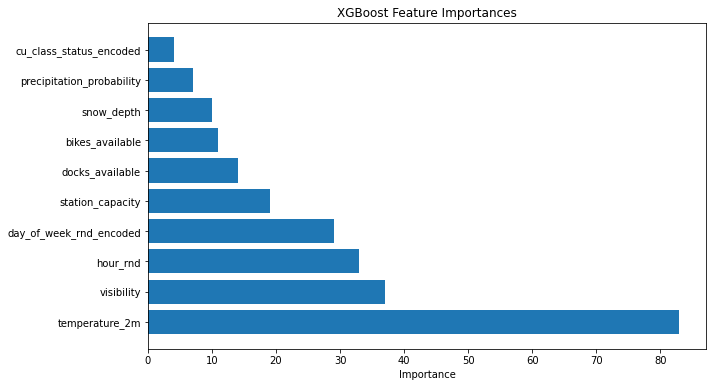

In [30]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming xgb_model is your trained XGBoost model
# You can access feature importances directly from the model
feature_importances = xg_reg.get_booster().get_score(importance_type='weight')

# Sort the feature importances
sorted_feature_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(*zip(*sorted_feature_importances))
plt.xlabel('Importance')
plt.title('XGBoost Feature Importances')
plt.show()



Mean Squared Error (MSE): 15126.527697170117
Root Mean Squared Error (RMSE): 122.98994957788265
Mean Absolute Error (MAE): 70.01707798622894
R-squared: 0.43377784958610577


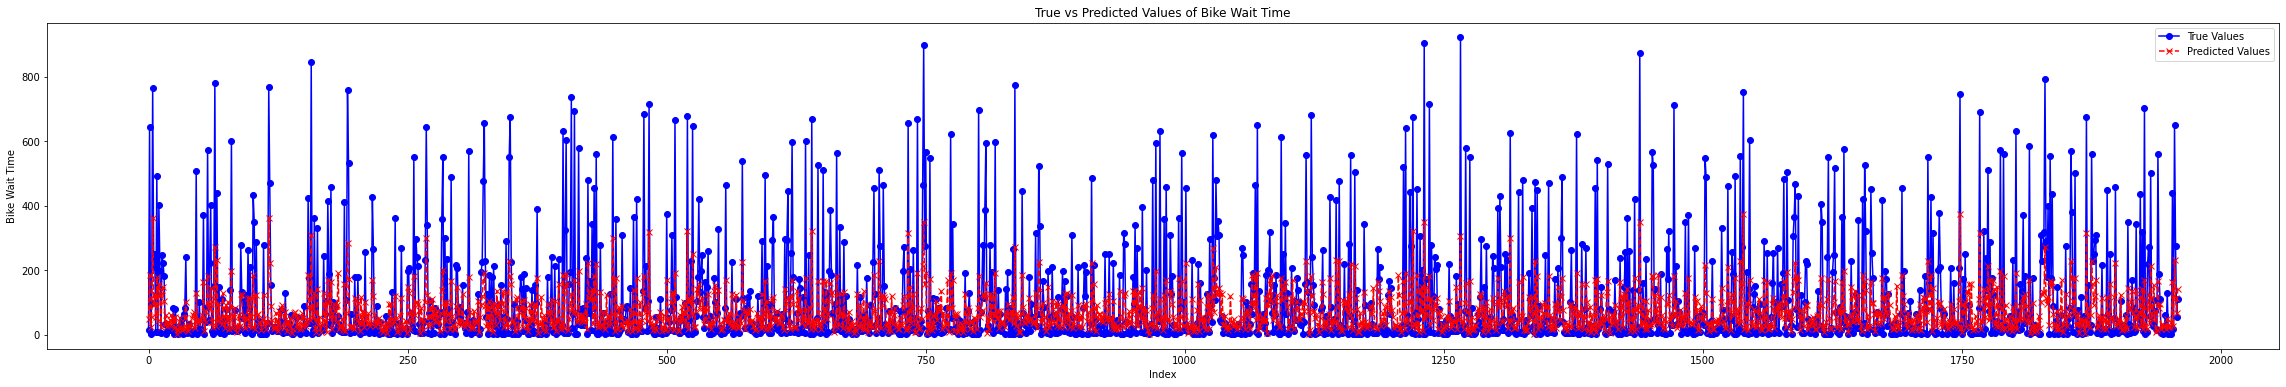

In [93]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Assuming X_bike contains input features and Y_bike contains output variable
X_train, X_test, y_train, y_test = train_test_split(X_dock, Y_dock, test_size=0.2, random_state=42)

# Initialize XGBoost regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=10)

# Fit the model
xg_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = xg_reg.predict(X_test)


# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = (mse)**0.5  # Calculating RMSE from MSE

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")

# Plot true values and predicted values in a line chart
plt.figure(figsize=(40, 6))
plt.plot(np.arange(len(y_test)), y_test, label='True Values', marker='o', linestyle='-', color='blue')
plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Values', marker='x', linestyle='--', color='red')

plt.xlabel('Index')
plt.ylabel('Bike Wait Time')
plt.title('True vs Predicted Values of Bike Wait Time')
plt.legend()
plt.show()

## Deep learning

In [99]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming X_bike contains input features and Y_bike contains output variable
# Include the new columns after one-hot encoding in X_bike
X_train, X_test, y_train, y_test = train_test_split(X_bike, Y_bike, test_size=0.2, random_state=42)

# Create a simple deep learning model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on test data
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")

# Plotting loss history during training
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot true vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()


ImportError: cannot import name 'OrderedDict' from 'typing' (c:\users\santh\appdata\local\programs\python\python37\lib\typing.py)

## Linear multiple regression

Mean Squared Error (MSE): 13548.91058788868
Root Mean Squared Error (RMSE): 116.3997877484692
Mean Absolute Error (MAE): 80.47160665265791
R-squared: 0.4070199925850153


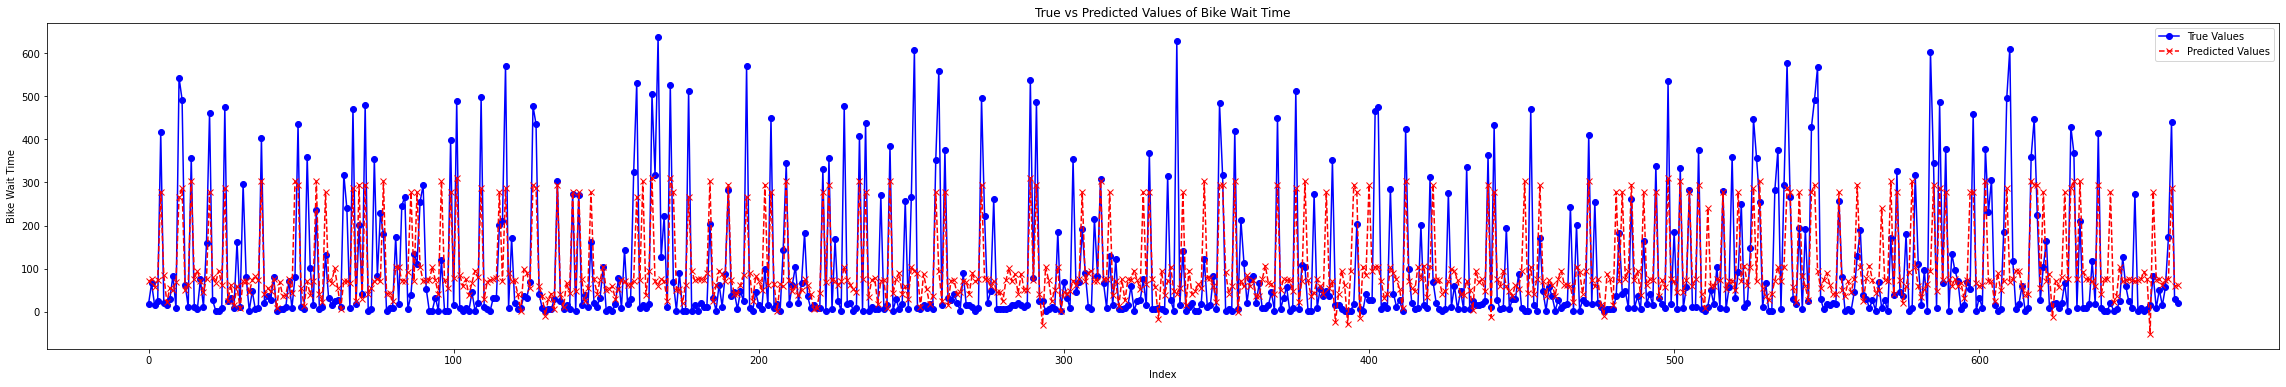

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming X_bike contains input features and Y_bike contains output variable
# Include the new columns after one-hot encoding in X_bike
X_train, X_test, y_train, y_test = train_test_split(X_bike, Y_bike, test_size=0.2, random_state=42)

# Initialize Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = (mse)**0.5  # Calculating RMSE from MSE

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")

# Plot true values and predicted values in a line chart
plt.figure(figsize=(40, 6))
plt.plot(np.arange(len(y_test)), y_test, label='True Values', marker='o', linestyle='-', color='blue')
plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Values', marker='x', linestyle='--', color='red')

plt.xlabel('Index')
plt.ylabel('Bike Wait Time')
plt.title('True vs Predicted Values of Bike Wait Time')
plt.legend()
plt.show()


In [118]:
y_test

,bike_wait_time
438,18.0
2886,66.0
3240,15.0
1097,24.0
1461,417.0
...,...
965,57.0
1006,174.0
2394,441.0
582,30.0


In [126]:
y_test['y_pred']= y_pred
y_test['diff'] = y_test['bike_wait_time']- y_test['y_pred']

y_test.head(50)

,bike_wait_time,y_pred,diff
438,18.0,81.030968,-63.030968
2886,66.0,38.472027,27.527973
3240,15.0,59.241959,-44.241959
1097,24.0,39.319443,-15.319443
1461,417.0,131.990341,285.009659
2615,21.0,33.660500,-12.660500
790,15.0,12.845325,2.154675
321,30.0,59.316330,-29.316330
2098,84.0,57.107605,26.892395
2236,9.0,14.162668,-5.162668
